In [32]:
# load data
import pandas as pd
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"
cardf = pd.read_csv(URL)
print(cardf.head())
print(cardf.dtypes)


     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  
model            object
year              int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
price             int64
dtype: object


In [33]:
# Find columns with null values
columns_w_null = cardf.columns[cardf.isnull().any()].tolist()

# Fill columns with each column mean value
for col in columns_w_null:
    cardf[col] = cardf[col].fillna(cardf[col].mean())

cardf.drop_duplicates(inplace=True)
cardf.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


In [34]:
# Check Feature Correlation for non-categorical values
numerical_columns = cardf.columns[cardf.dtypes != object].tolist()
correlation_matrix = cardf[numerical_columns].corr()
# Sort according to absolute value
correlation_matrix['price'].sort_values(key= lambda x: abs(x), ascending=False)

price         1.000000
year          0.635715
mileage      -0.530483
engineSize    0.411451
tax           0.405970
mpg          -0.346263
Name: price, dtype: float64

In [35]:
# Count cars per fuel type 
cars_per_fueltype = cardf.groupby('fuelType').count()
print(cars_per_fueltype[['model']])

          model
fuelType       
Diesel     5706
Electric      2
Hybrid       22
Other         1
Petrol    12081


<Axes: xlabel='transmission', ylabel='price'>

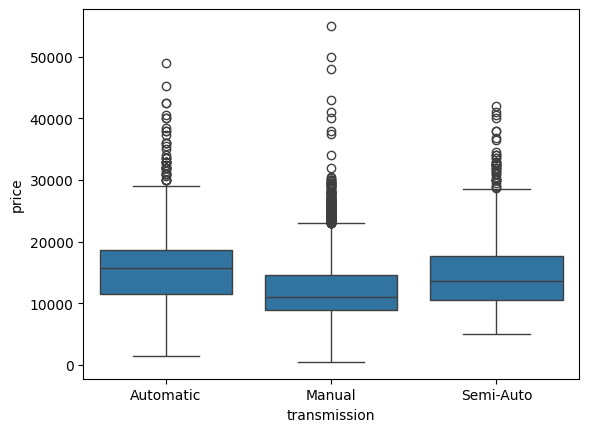

In [36]:
# Check for outliers
import seaborn as sns

sns.boxplot(x=cardf['transmission'], y=cardf['price'])


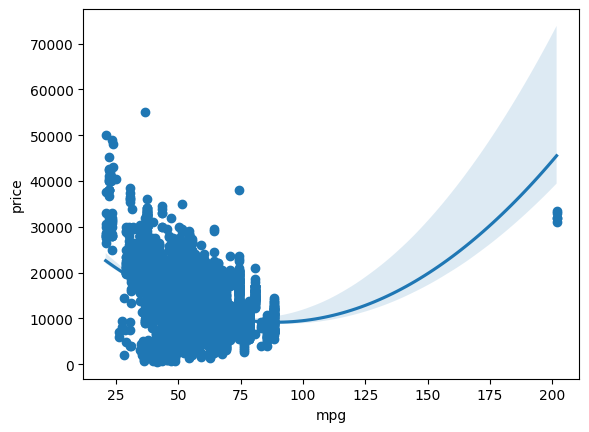

In [37]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.scatter(x=cardf['mpg'], y=cardf['price'])
sns.regplot(x=cardf['mpg'],y=cardf['price'], scatter = False, order=2)
plt.show()

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Predict price only using mpg
mpg = cardf['mpg'].to_numpy().reshape(-1,1)
price = cardf['price'].to_numpy().reshape(-1,1)

model = LinearRegression()

model.fit(mpg, price)

price_predicted = model.predict(mpg)

print(r2_score(y_true=price, y_pred=price_predicted))
print(mean_squared_error(y_true=price, y_pred= price_predicted))


0.11989802249624182
19741690.80944619


In [39]:
# Add input features
features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

input_data = cardf[features].to_numpy()
print(input_data.shape)


(17812, 5)


In [40]:
# Train and evaluate linear regressor with raw data and 
model.fit(input_data, price)

price_predicted = model.predict(input_data)

print(r2_score(y_true=price, y_pred=price_predicted))
print(mean_squared_error(y_true=price, y_pred= price_predicted))

0.7265379654547047
6134065.224381636


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
# Pipeline for Scaling and Feature Engineering before fitting linear regression
linear_regression_pipeline = Pipeline(
    [
        ('scaler',StandardScaler()),
        ('polynomial', PolynomialFeatures(degree=2)),
        ('regressor', LinearRegression())
    ]
)

linear_regression_pipeline.fit(input_data, price)

price_predicted = linear_regression_pipeline.predict(input_data)

print(r2_score(y_true=price, y_pred=price_predicted))
print(mean_squared_error(y_true=price, y_pred= price_predicted))


0.7666619695239302
5234038.065462741


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(input_data, price, test_size=0.2)

ridge_regression_pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2)),
    ('regressor', Ridge())
])

ridge_regression_pipeline.fit(X_train, y_train)

price_predicted = ridge_regression_pipeline.predict(X_test)

print(r2_score(y_true=y_test, y_pred=price_predicted))
print(mean_squared_error(y_true=y_test, y_pred= price_predicted))

0.7508798389028514
5552395.281474144
